In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
data=pd.read_csv('2022-2023 Football Team Stats.csv', encoding='latin-1', delimiter=';')


In [6]:
data.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Barcelona,ESP,1,29,23,4,2,53,9,44,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen
1,2,Napoli,ITA,1,30,24,3,3,66,21,45,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,44,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma
3,4,Arsenal,ENG,1,32,23,6,3,77,34,43,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale
4,5,Manchester City,ENG,2,30,22,4,4,78,28,50,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson


In [8]:
data.shape

(98, 20)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/MP           98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Attendance       9

In [10]:
data.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

Columns' description are listed below.


* Rk : Rank
* Squad : Squad's name
* Country : Name of the country
* LgRk : Squad finish within the league
* MP : Matches played
* W : Wins
* D : Draws
* L : Losses
* GF : Goals for
* GA : Goals against
* GD : Goal difference
* Pts : Points
* Pts/MP : Points per game
* xG : Expected goals
* xGA : Expected goals allowed
* xGD : Expected goals difference
* xGD/90 : Expected goals difference per 90 minutes
* Attendance : Attendance per game during this season, only for home matches
* Top Team Scorer : Top team scorer in league play
* Goalkeeper : Goalkeeper with the most minutes in league play

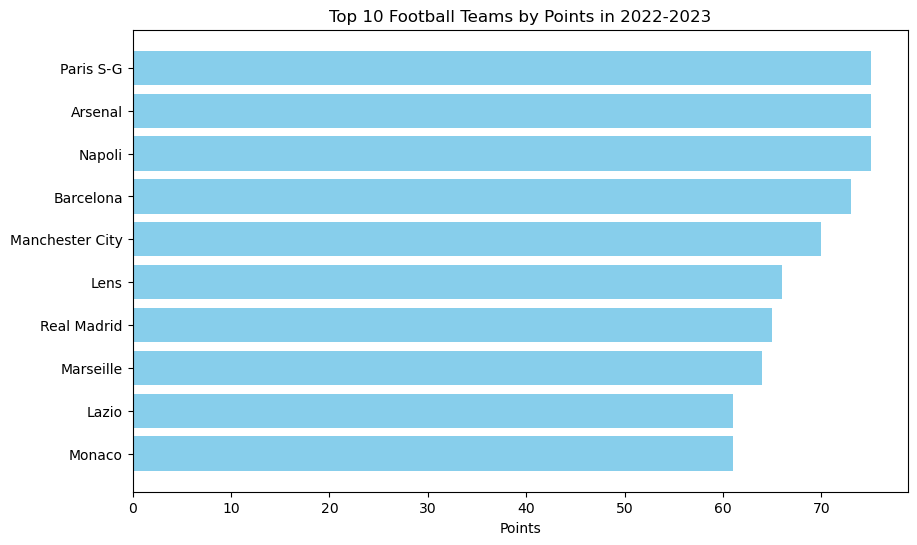

In [11]:
# Sort the teams based on Points (Pts) in descending order
top_teams = data.sort_values(by='Pts', ascending=False).head(10)

# Plotting a bar chart of the top 10 teams by Points
plt.figure(figsize=(10, 6))
plt.barh(top_teams['Squad'], top_teams['Pts'], color='skyblue')
plt.xlabel('Points')
plt.title('Top 10 Football Teams by Points in 2022-2023')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

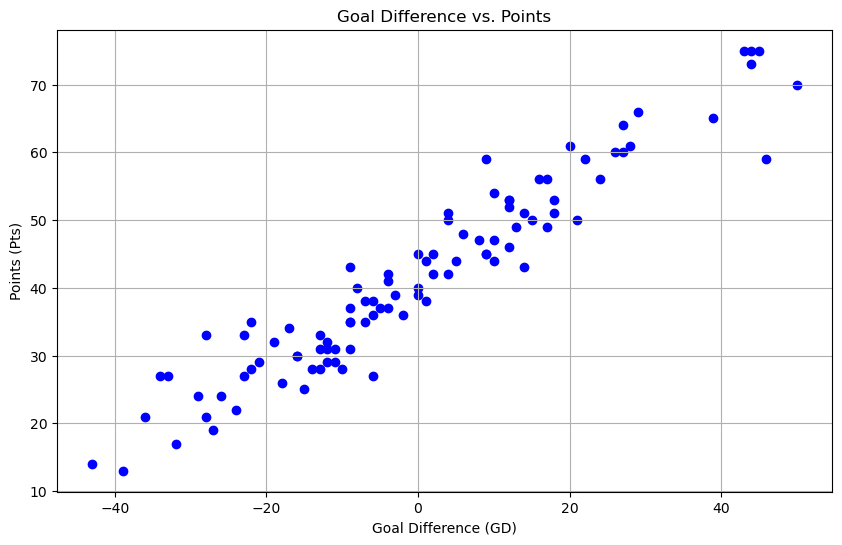

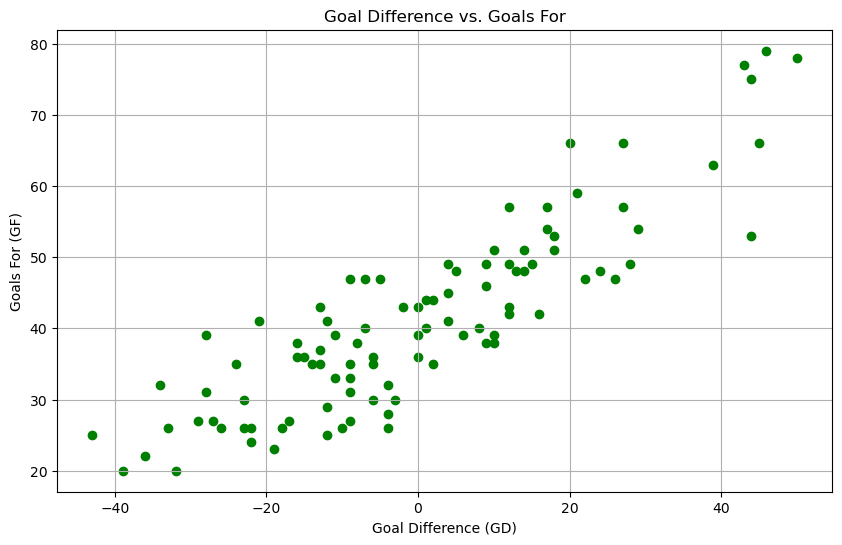

In [12]:
# Scatter plot for GD vs. Pts
plt.figure(figsize=(10, 6))
plt.scatter(data['GD'], data['Pts'], color='blue')
plt.title('Goal Difference vs. Points')
plt.xlabel('Goal Difference (GD)')
plt.ylabel('Points (Pts)')
plt.grid(True)
plt.show()

# Scatter plot for GD vs. GF
plt.figure(figsize=(10, 6))
plt.scatter(data['GD'], data['GF'], color='green')
plt.title('Goal Difference vs. Goals For')
plt.xlabel('Goal Difference (GD)')
plt.ylabel('Goals For (GF)')
plt.grid(True)
plt.show()

In [18]:


# Extract the goal scorers and their goals from the 'Top Team Scorer' column
data['Scorer Name'] = data['Top Team Scorer'].apply(lambda x: x.split(' - ')[0])
data['Goals Scored'] = data['Top Team Scorer'].apply(lambda x: int(x.split(' - ')[1]))

# Find the top scorer by sorting the data based on 'Goals Scored'
top_scorers = data.sort_values(by='Goals Scored', ascending=False).head(10)

# Display the top scorer information as a table
top_scorer_table = top_scorers[['Scorer Name', 'Goals Scored', 'Squad']]
top_scorer_table

,Scorer Name,Goals Scored,Squad
4,Erling Haaland,32,Manchester City
24,Harry Kane,23,Tottenham
2,Kylian Mbappé,22,Paris S-G
22,Jonathan David,21,Lille
1,Victor Osimhen,21,Napoli
30,Alexandre Lacazette,19,Lyon
45,Ivan Toney,19,Brentford
36,Folarin Balogun,18,Reims
0,Robert Lewandowski,17,Barcelona
14,Wissam Ben Yedder,17,Monaco


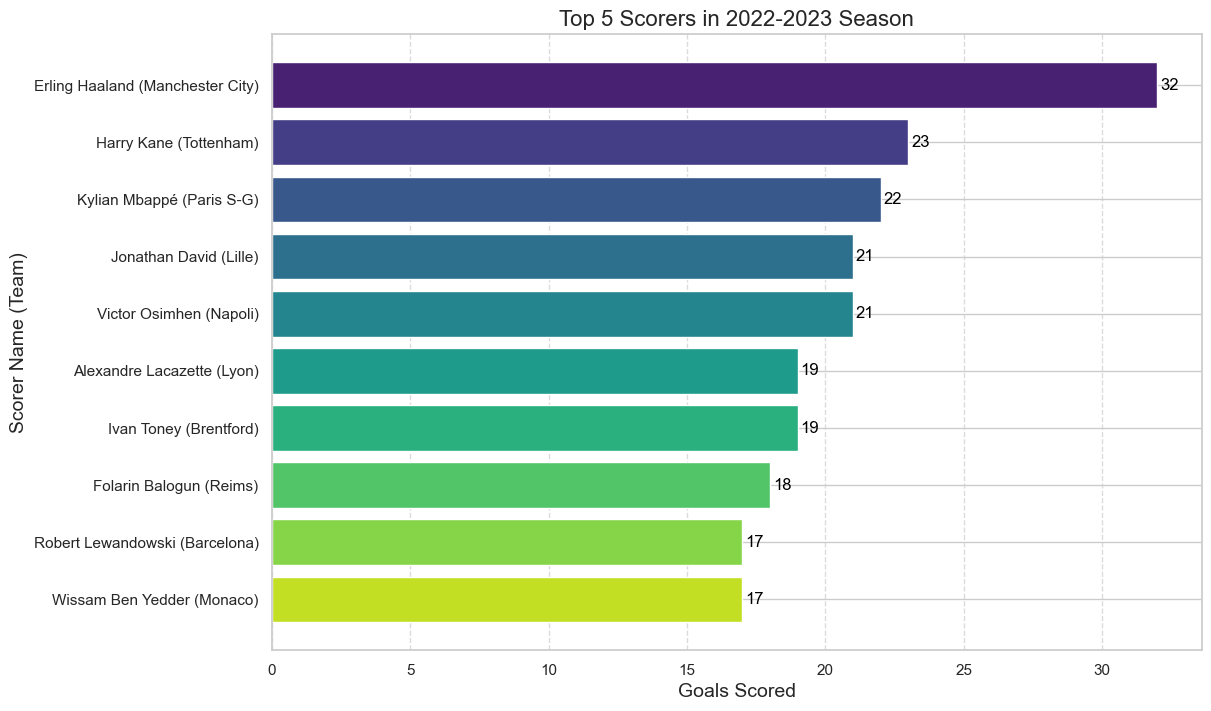

In [19]:

# Set the style
sns.set(style="whitegrid")

# Visualize the top 5 scorers
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(top_scorers))

bars = plt.barh(top_scorers['Scorer Name'] + " (" + top_scorers['Squad'] + ")", top_scorers['Goals Scored'], color=colors)
plt.xlabel('Goals Scored', fontsize=14)
plt.ylabel('Scorer Name (Team)', fontsize=14)
plt.title('Top 5 Scorers in 2022-2023 Season', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the top scorer at the top

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotations
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', 
             va='center', ha='left', fontsize=12, color='black')

plt.show()

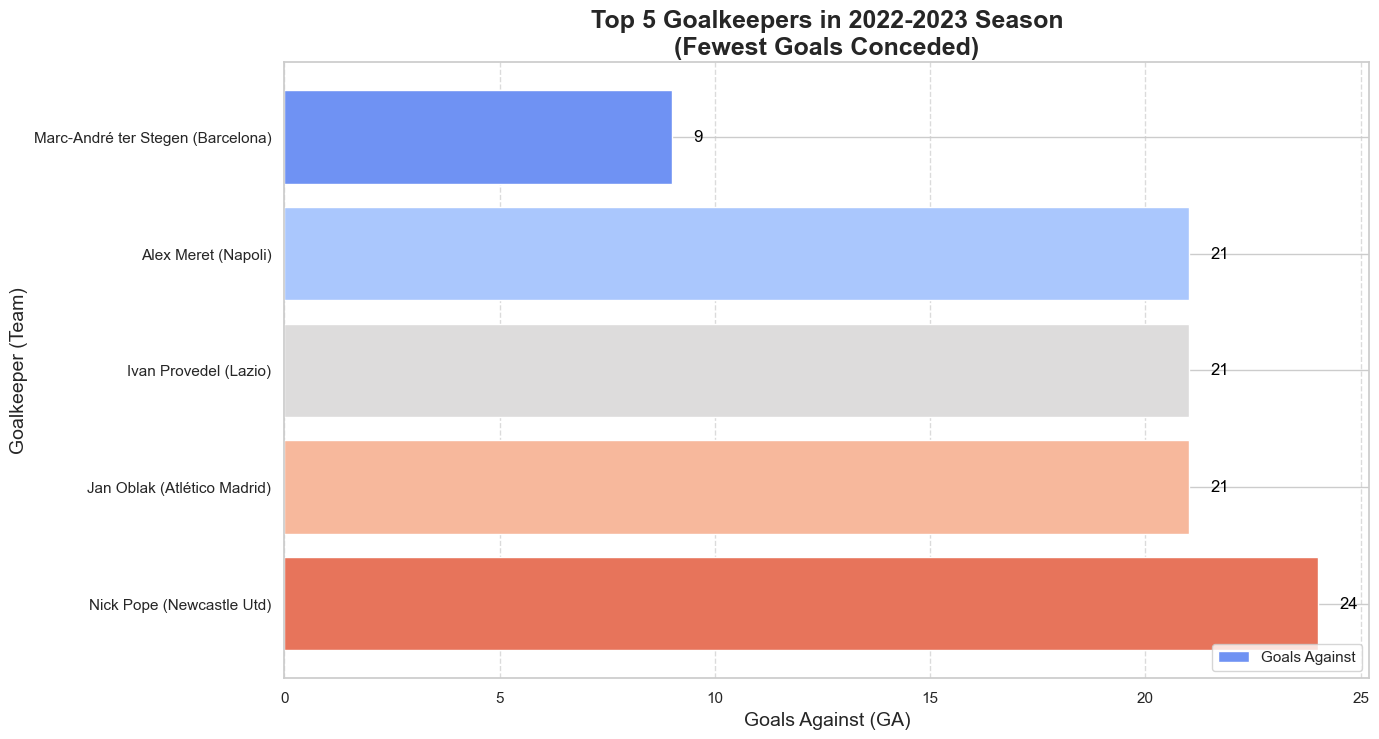

In [21]:


# Sort the data by 'GA' (Goals Against) to find the goalkeepers with the fewest goals conceded
best_goalkeepers = data.sort_values(by='GA', ascending=True).head(5)

# Set up the color palette for the bar colors (gradient from blue to green)
colors = sns.color_palette("coolwarm", len(best_goalkeepers))

# Create the horizontal bar chart with annotations
plt.figure(figsize=(14, 8))
bars = plt.barh(best_goalkeepers['Goalkeeper'] + " (" + best_goalkeepers['Squad'] + ")", best_goalkeepers['GA'], color=colors)
plt.xlabel('Goals Against (GA)', fontsize=14)
plt.ylabel('Goalkeeper (Team)', fontsize=14)
plt.title('Top 5 Goalkeepers in 2022-2023 Season\n(Fewest Goals Conceded)', fontsize=18, fontweight='bold')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotations to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=12, color='black')

plt.gca().invert_yaxis()  # Invert y-axis to have the best goalkeeper at the top

# Add a legend
plt.legend(['Goals Against'], loc='lower right')

plt.show()

In [30]:

#Attendance in Europe

Attendance["squad/country"] = Attendance[["Squad", "Country"]].astype(str).agg(" - ".join, axis=1)
Attendance["label"] = [i + '\n' + str(j) for i, j in zip(Attendance["squad/country"], Attendance["Attendance"])]
Attendance["Attendance"] = pd.to_numeric(Attendance["Attendance"], errors='coerce')
Attendance = Attendance[:25].sort_values(by="Attendance", ascending=False)


/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_3190/2763607525.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = get_cmap('vlag_r')
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not

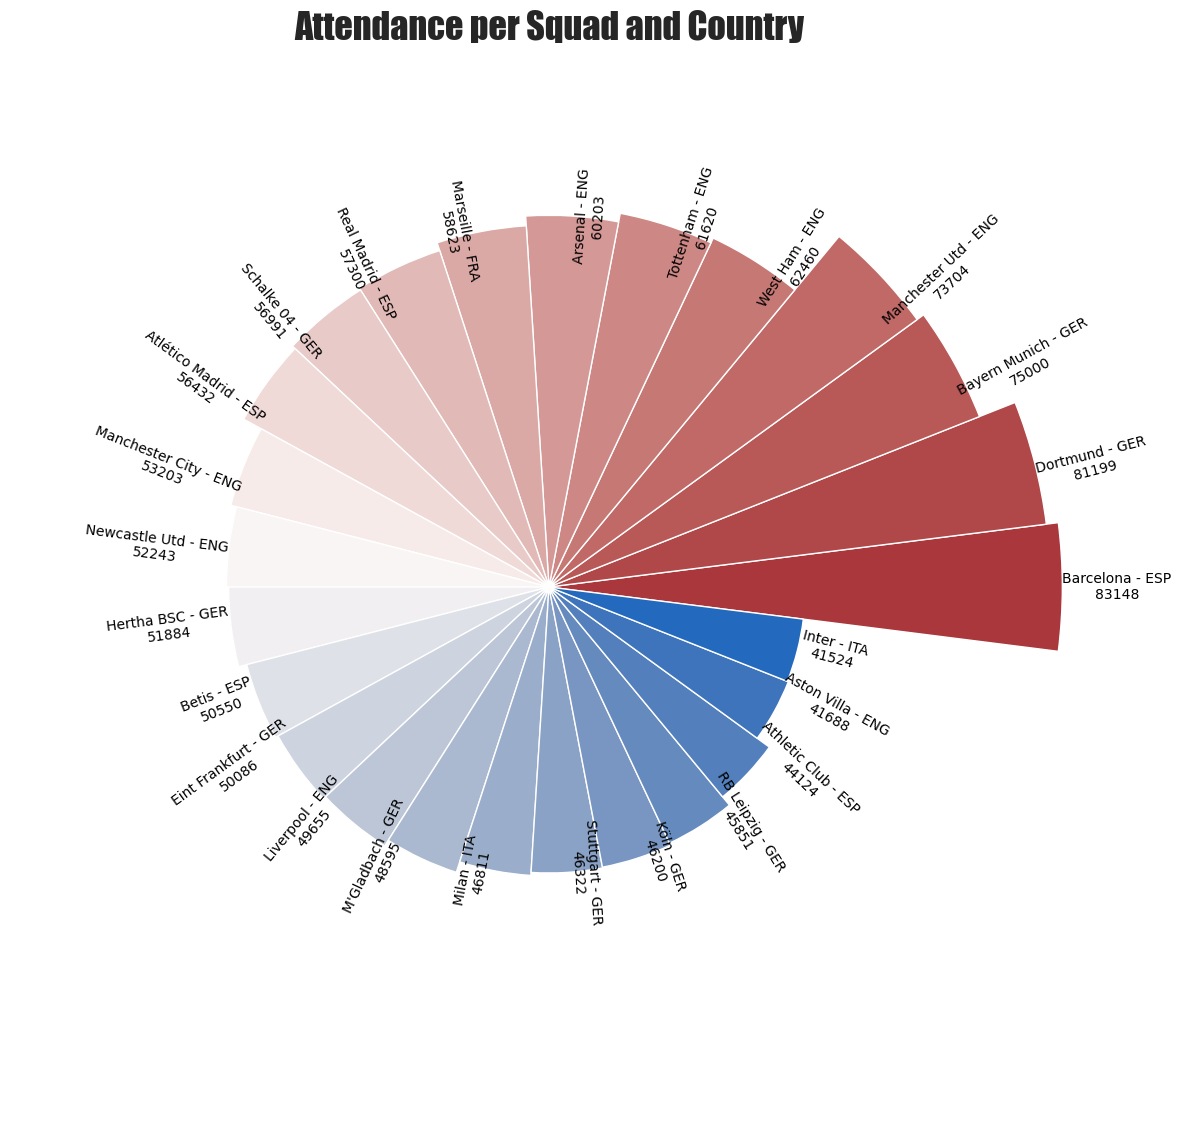

In [31]:
from matplotlib.cm import get_cmap

# Plot settings
plt.figure(figsize=(14, 14))
sns.set_style('whitegrid')
ax = plt.subplot(111, polar=True)
ax.grid(False)
plt.axis("off")

# Font settings for the labels
fontlabels = {
    'family': 'Microsoft Tai Le',
    'color': 'black',
    'size': '10',
}

# Data for the circular bar chart
lowerlimit = 0
heights = list(Attendance["Attendance"])
width = 2 * np.pi / len(Attendance)
indexes = [i for i in range(1, len(Attendance)+1)]
angles = [element * width for element in range(len(Attendance))]

# Colors for the bars using a colormap
color_map = get_cmap('vlag_r')
colors = color_map(np.linspace(0, 1, len(Attendance)))

# Create the bars
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerlimit,
              linewidth=1, edgecolor='white', color=colors)

labelpadding = 15
for bar, angle, height, label in zip(bars, angles, heights, Attendance["label"]):
    rotation = np.rad2deg(angle)
    alignment = ""

    # Adjust text alignment and rotation based on angle
    if angle > np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Add text labels to the bars
    ax.text(x=angle, y=lowerlimit + bar.get_height() + labelpadding,
            s=label, ha=alignment, va='center', rotation=rotation,
            multialignment='center', fontdict=fontlabels)

# Remove the theta grid (angle lines)
ax.set_xticks([])

# Set radial grid label position
ax.set_rlabel_position(-14)

# Add title
ax.set_title("Attendance per Squad and Country", 
             fontdict={'fontsize': 26, 'fontfamily': 'Impact'}, 
             loc='center')

# Show the plot
plt.show()


Visualization of the W, D and L matches for the best five squads in each league

In [32]:
# Create an empty list to store the top 5 squads for each country
top_squads = []
countries = data["Country"].unique()  # Get unique countries

# Iterate over each country and get the top 5 squads based on wins (W)
for country in countries: 
    top_5_squads = data[data["Country"] == country].sort_values("W", ascending=False)[:5]
    top_squads.append(top_5_squads)

# Concatenate the list of DataFrames into one DataFrame
match = pd.concat(top_squads)

# Sort the resulting DataFrame by the 'W' column in descending order
match = match.sort_values(by="W", ascending=False)

# Create the 'label' column by combining 'Squad' and 'Country'
match["label"] = match[["Squad", "Country"]].agg(' - '.join, axis=1)

# Select only the necessary columns: Country, Squad, W, L, D, and label
subset_match = match[["Country", "Squad", "W", "L", "D", "label"]]

# Display the subset
subset_match.head()



,Country,Squad,W,L,D,label
2,FRA,Paris S-G,24,5,3,Paris S-G - FRA
1,ITA,Napoli,24,3,3,Napoli - ITA
0,ESP,Barcelona,23,2,4,Barcelona - ESP
3,ENG,Arsenal,23,3,6,Arsenal - ENG
4,ENG,Manchester City,22,4,4,Manchester City - ENG


findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Font family 'Microsoft Tai Le' not found.
findfont: Fo

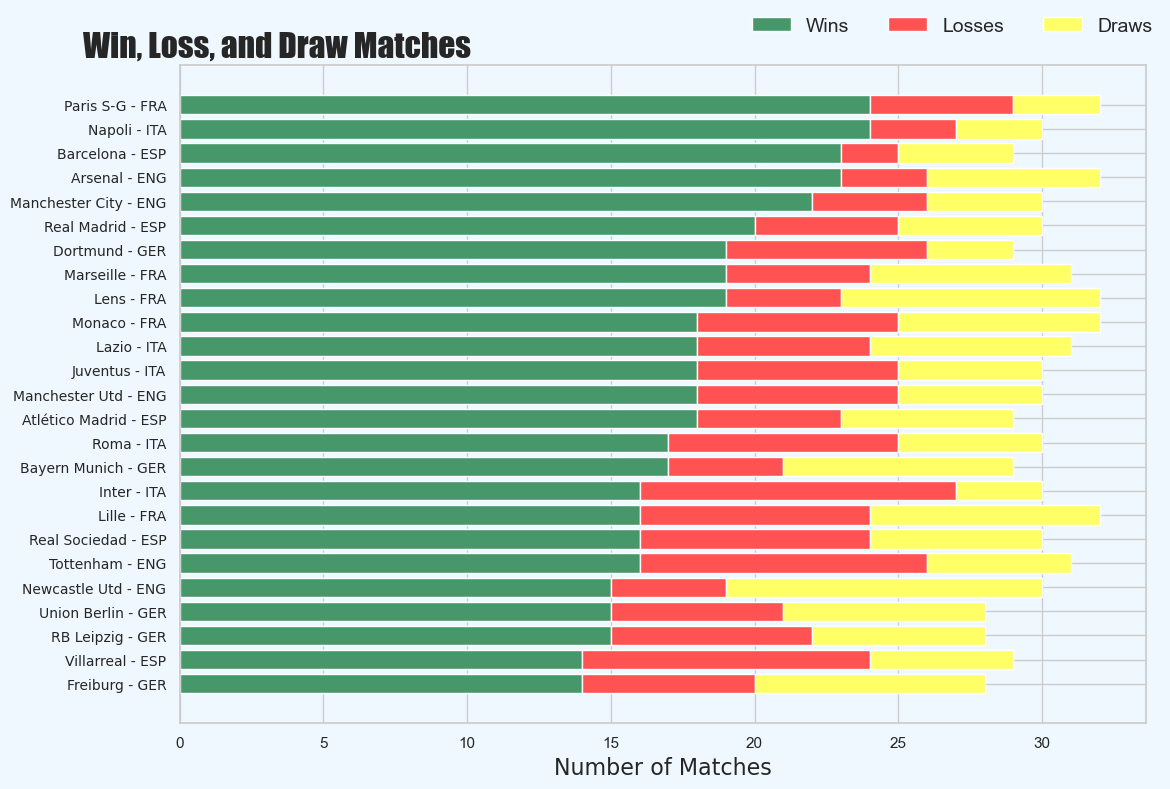

In [33]:
# Data subset with the relevant columns
subset_match = match[["label", "W", "L", "D"]]
subset_match = subset_match.sort_values(by="W", ascending=True)

# Extract labels and values
labels = subset_match["label"]
W = subset_match["W"]
L = subset_match["L"]
D = subset_match["D"]

# Set y positions and bar height
y_pos = np.arange(len(labels))

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot stacked horizontal bars for W, L, and D
bars1 = ax.barh(y_pos, W, color='#46986a', label='Wins')   # Wins
bars2 = ax.barh(y_pos, L, left=W, color='#ff5252', label='Losses')  # Losses stacked on Wins
bars3 = ax.barh(y_pos, D, left=W+L, color='#ffff66', label='Draws') # Draws stacked on Wins + Losses

# Add labels to x and y axis
ax.set_xlabel('Number of Matches', fontsize=16, family='Microsoft Tai Le')

# Adjust title: Align it to the left and move its position slightly
ax.set_title('Win, Loss, and Draw Matches', fontsize=24, family='Impact', loc='left', x=-0.1)

# Add y-ticks with squad labels
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=10, family='Microsoft Tai Le')

# Customizing legend
ax.legend(title='', loc='upper center', bbox_to_anchor=(0.8, 1.1), ncol=3, fontsize=14, frameon=False)

# Adjust spacing between plot and other elements
plt.subplots_adjust(top=0.85, bottom=0.1, left=0.15, right=0.9)

# Set background color and layout
fig.patch.set_facecolor('aliceblue')
ax.set_facecolor('aliceblue')

# Display the plot
plt.tight_layout()
plt.show()


GF, GA and GD

In [34]:
# Step 1: Filter relevant columns
goals_df = data[["Squad", "Country", "GF", "GA", "GD"]]

# Step 2: Initialize an empty list to store results
filtered_goals = []

# Step 3: Iterate over the countries and filter top 5 squads by goals scored (GF)
for i in countries: 
    top_squads = goals_df[goals_df["Country"] == i].sort_values(by='GF', ascending=False).head(5)
    filtered_goals.append(top_squads)

# Step 4: Concatenate the filtered results into a single DataFrame
goals = pd.concat(filtered_goals, ignore_index=True)


In [35]:
goals["label"] = goals[["Squad", "Country"]].agg(' - '.join, axis=1) #create label

In [36]:
import plotly.express as px #data visualization
from plotly.subplots import make_subplots
import plotly.graph_objects as go #data visualization
def get_color(color_name, number_of_colors): 
    pal = list(sns.color_palette(palette=color_name, n_colors=number_of_colors).as_hex())
    return pal
#visualization
goals = goals.sort_values(by="GF", ascending=True)
fig = make_subplots(rows=1, cols=3, shared_yaxes=True)
fig.append_trace(go.Bar(x=goals["GF"], y=goals["label"], orientation='h', 
                        marker_color=get_color("light:seagreen", len(goals)),
                       marker_line_color='black',
                       marker_line_width=0.15, name="GF", text=[str(i) for i in list(goals["GF"])], 
                       textposition='outside'), row=1,col=1)
fig.append_trace(go.Bar(x=goals["GA"], y=goals["label"], orientation='h',
                       marker_color=get_color("light:r", len(goals)), 
                       marker_line_color='black', 
                       marker_line_width=0.15, name="GA", text=[str(i) for i in list(goals["GA"])],
                       textposition='outside'), row=1, col=2)
fig.append_trace(go.Bar(x=goals["GD"], y=goals["label"], orientation='h',
                       marker_color=get_color("light:y", len(goals)),
                       marker_line_color='black',
                       marker_line_width=0.15, name="GD", text=[str(i) for i in list(goals["GD"])],
                       textposition='outside'), row=1, col=3)
fig.update_layout(title={'text': 'Number of GF, GA and GD','x':0.1, 'y':0.92},
                titlefont_size=30,
                titlefont_family='Impact',
                titlefont_color='black',
                height=600,
                template='simple_white',
                 xaxis1=dict(title="Number of GF", titlefont_size=16, titlefont_family='Microsoft Tai Le'),
                 xaxis2=dict(title="Number of GA", titlefont_size=16, titlefont_family='Microsoft Tai Le'),
                 xaxis3=dict(title="Number of GD", titlefont_size=16, titlefont_family='Microsoft Tai Le'),
                  showlegend=False
                 )
#fig.show()

The number of points per match played "Pts/G"

In [37]:
pts_g = data[["Squad", "Country", "Pts/MP"]][:20] #Pts/G dataframe
pts_g["label"] = pts_g[["Squad", "Country"]].agg(' - '.join, axis=1)
pts_g.head()

,Squad,Country,Pts/MP,label
0,Barcelona,ESP,2.52,Barcelona - ESP
1,Napoli,ITA,2.50,Napoli - ITA
2,Paris S-G,FRA,2.34,Paris S-G - FRA
3,Arsenal,ENG,2.34,Arsenal - ENG
4,Manchester City,ENG,2.33,Manchester City - ENG


In [38]:
#Pie chart 
fig = px.pie(pts_g, values="Pts/MP", color='label', color_discrete_sequence=get_color('magma', len(pts_g)), names='label', 
            hole=None)
fig.update_traces(textposition='inside', 
                 textinfo='label+text+value')
fig.update_layout(title={'text': 'Points per match played', 'x': 0.5, 'y':0.95},
                  titlefont_size=30, 
                  titlefont_family='Impact',
                 showlegend=False,
                 height=500, 
                 width=500,
                 margin=dict(b=5, l=5, r=5),
                 )
#fig.show()

Expected goals

In [39]:
expected = data[["Squad", "Country", "xG", "xGA", "xGD"]] #expected dataframe 
expected["label"] = ['<b>'+i+'<br>'+j for i, j in zip(expected['Squad'], expected["Country"])] #create a label
expected = expected.sort_values(by='xG', ascending=False)[:25]
expected.head()

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_3190/2864653438.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Squad,Country,xG,xGA,xGD,label
2,Paris S-G,FRA,64.7,39.1,25.7,<b>Paris S-G<br>FRA
3,Arsenal,ENG,64.1,34.7,29.4,<b>Arsenal<br>ENG
5,Real Madrid,ESP,64.1,27.5,36.6,<b>Real Madrid<br>ESP
4,Manchester City,ENG,63.5,24.5,39.0,<b>Manchester City<br>ENG
10,Bayern Munich,GER,62.7,31.8,30.8,<b>Bayern Munich<br>GER


In [40]:
#Radar chart 
rxG_list = list(expected["xG"])
rxG_list.append(rxG_list[0])
rxGA_list = list(expected["xGA"])
rxGA_list.append(rxGA_list[0])
rxGD_list = list(expected["xGD"])
rxGD_list.append(rxGD_list[0])
theta_list = list(expected["label"])
theta_list.append(theta_list[0])
#r_list = [rxG_list, rxGA_list, rxGD_list]
#theta_list
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=rxG_list, theta=theta_list, fill='toself', line_color=get_color('rocket_r', len(expected))[6], 
                             name='xG'))
fig.add_trace(go.Scatterpolar(r=rxGA_list, theta=theta_list, fill="toself", line_color=get_color('rocket_r', len(expected))[12],
                             name="xGA"))
fig.add_trace(go.Scatterpolar(r=rxGD_list, theta=theta_list, fill='toself', line_color=get_color('rocket_r', len(expected))[18],
                             name="xGD"))
fig.update_traces(mode='lines+markers',marker=dict(symbol='square'))
fig.update_layout(height=700, 
                 width=800,
                  title={'text': "Expected goals xG, Expected Goals Against xGA and Expected difference xGD (xGD = xG - xGA)",
                         'x':0.050,
                        'y': 0.95},
                  titlefont_family='cambria',
                  titlefont_size=18,
                  template=None,
                  polar = dict(
                  radialaxis_tickfont_size=14,
                  radialaxis_tickfont_family='Arial'),
                 legend=dict(yanchor="bottom",
                            xanchor='center',
                            x=0.5,
                            y=-0.19,
                            orientation='h',
                            font=dict(size=16)),
                 )
#fig.show()

Distributions of W, D and L matches / GF, GA and GD

In [41]:
dist = data[["Country", "W", "D", "L", "GF", "GA", "GD"]] #create dist dataframe 
countries = list(dist["Country"].value_counts().index) #list of countries
#colors of distributions 
color = get_color("magma", len(countries))
color1 = get_color("bone", len(countries))
color2 = get_color("viridis", len(countries))
color3 = get_color('mako', len(countries))
color4 = get_color('rocket', len(countries))
color5 = get_color('icefire', len(countries))

In [42]:
fig = make_subplots(rows=2, cols=3, shared_yaxes=True, horizontal_spacing=0.02)
for c, i in zip(countries, color):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["W"]), 
                        line_color=i,
                       name=c,
                        ), row=1, col=1)
for c, i in zip(countries, color1):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["L"]), 
                        line_color=i,
                       name=c,
                        ), row=1, col=2)
for c, i in zip(countries, color2):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["D"]), 
                        line_color=i,
                       name=c,
                        ), row=1, col=3)
for c, i in zip(countries, color3):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["GF"]),
                              line_color=i,
                              name=c), row=2, col=1)
for c, i in zip(countries, color4):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["GA"]),
                              line_color=i,
                              name=c), row=2, col=2)
for c, i in zip(countries, color5):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["GD"]),
                              line_color=i,
                              name=c), row=2, col=3)
fig.update_traces(orientation='h', side='positive', points=False, width=3)

fig.update_layout(
    height=600,
    width=1200,
    template='simple_white', 
    showlegend=False,
    xaxis1=dict(title='Win matches', titlefont_size=14, titlefont_family='Arial', 
                minor=dict(nticks=5, showgrid=False, ticklen=4, tickmode='auto')),
    xaxis2=dict(title="Loss matches", titlefont_size=14, titlefont_family='Arial',
               minor=dict(nticks=5, showgrid=False, ticklen=4, tickmode='auto')),
    xaxis3=dict(title='Draw matches', titlefont_size=14, titlefont_family='Arial',
               minor=dict(nticks=5, showgrid=False, ticklen=4, tickmode='auto')),
    xaxis4=dict(title='Number of goals for "GF"', titlefont_size=14, titlefont_family='Arial',
                tickvals=[0, 20, 40, 60, 80, 100],
                minor=dict(showgrid=False, ticklen=4)),
    xaxis5=dict(title='Number of goals against "GA"', titlefont_size=14, titlefont_family='Arial', 
                tickvals=[i*20 for i in range(6)],
               minor=dict(nticks=5, showgrid=False, ticklen=4)),
    xaxis6=dict(title='Number of goals draw "GD"', titlefont_size=14, titlefont_family='Arial',
                tickvals=[-80, -50, -20, 10, 30, 60, 90],
               minor=dict(showgrid=False, ticklen=4)),
    title=dict(text='Distributions of Win, Loss and Draw matches', font_size=30, font_family='Impact'),
    yaxis=dict(showgrid=True),
    yaxis1=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis2=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis3=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis4=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis5=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis6=dict(showgrid=True, gridcolor='grey', gridwidth=0.15), 
    plot_bgcolor = get_color('light:b', len(countries))[0], 
    #paper_bgcolor = 'yellow'
)
#fig.show()